In [2]:
!pip3 install pandas

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.10/bin/python3 -m pip install --upgrade pip' command.


In [19]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate
import numpy as np
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [10]:
df2 = pd.read_csv('diabetes.csv')
df2.head()
X2 = df2.iloc[:,0:-1]
y2 = df2.iloc[:,-1]

In [11]:
print(X2.head(),'\n')
print('labels:\n',y2.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33   

labels:
 0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64


/var/folders/8r/zpt069bx21b10h_2fztx_20c0000gn/T/ipykernel_83028/1317924507.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df2.hist(ax=ax)


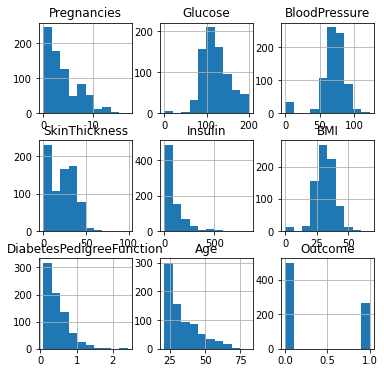

In [12]:
fig = plt.figure(figsize = (6,6))
ax = fig.gca()
df2.hist(ax=ax)
plt.show()

In [13]:
from sklearn import preprocessing

s = preprocessing.MinMaxScaler()
s.fit(X2)
X_norm2 = s.transform(X2)

# X = preprocessing.normalize(X, norm='l2')

print(type(X_norm2))

<class 'numpy.ndarray'>


In [62]:
print('Before Normalization')
print(X2.head(),'\n')
print('After Normalization')
print((pd.DataFrame(X_norm2)).head())

Before Normalization
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33   

After Normalization
          0         1         2         3         4         5         6  \
0  0.352941  0.743719  0.590164  0.353535  0.000000  0.500745  0.234415   
1  0.058824  0.427136  0.540984  0.292929  0.000000  0.396423  0.116567   
2  0.470588  0.919598  0.524590  0.000000  0.000000  0.347243  0.253629   
3  0.058824  0

## Performance Metrics

In [14]:
scoring = ['precision', 'recall', 'accuracy']
clf2 = KNeighborsClassifier(n_neighbors=12, metric='euclidean')
scores2 = cross_validate(clf2, X_norm2, y2,cv=5, scoring=scoring)

prec2 = np.mean(scores2['test_precision'])
rec2 = np.mean(scores2['test_recall'])
acc2 = np.mean(scores2['test_accuracy'])

print('Average precision is:' , prec2)
print('Average recall is:' , rec2)
print('Average accuracy is:' , acc2)

Average precision is: 0.7146309019885871
Average recall is: 0.47393431167016076
Average accuracy is: 0.750021220609456


## Precision Recall Curve

/usr/local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, '2-class Precision-Recall curve')

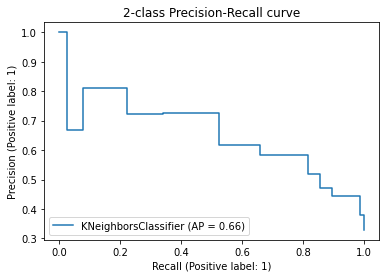

In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    X_norm2, y2, test_size=0.3, random_state=None)
clf2.fit(X_train, y_train)
disp = plot_precision_recall_curve(clf2, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve')
